<a href="https://colab.research.google.com/github/lakshmirnair/problem-solving-in-python/blob/master/problem-solving-in-python/ML_algorithm/Regression/heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!pip install kaggle

In [34]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"lakshmicse","key":"9fef5e28235ca1cb1ae73973670f2c87"}'}

In [35]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
#change the permission
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [36]:
!kaggle datasets download -d ranjeetjain3/seaborn-tips-dataset

seaborn-tips-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [37]:
#unzip the file 
from zipfile import ZipFile
f_name="seaborn-tips-dataset.zip"
with ZipFile(f_name,'r') as zip:
  zip.extractall()
  print("DONE")

DONE


In [38]:
import pandas as pd
df=pd.read_csv('tips.csv')
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [39]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tips_df = sns.load_dataset('tips')
tips_df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


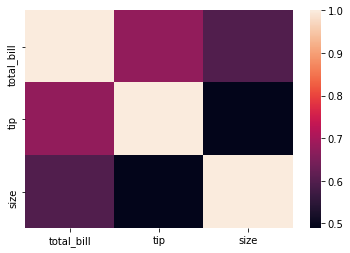

In [13]:
sns.heatmap(tips_df.corr())
#categorical variable hasnt been considered 

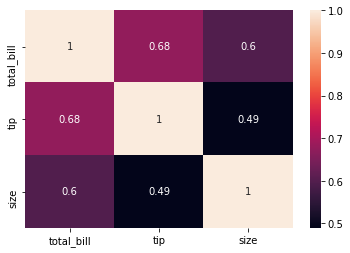

In [40]:
#using the annotation argument
sns.heatmap(tips_df.corr(), annot=True)

In [41]:
#about the data component 
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [42]:
#Data cleaning and feature engineering
#step:1 Changing the data types
#step:2 Checking the categories to a dummy variable so as to get only numeric vaules
cat_list = tips_df.select_dtypes(include='category').columns.to_list()
print(cat_list)

['sex', 'smoker', 'day', 'time']


In [43]:
#since day has more than 2 unique variables 
new_cat=['sex', 'smoker', 'time']

In [44]:

great_list = []
for i in new_cat:
  new_list = tips_df[i].unique().to_list()
  great_list.append(new_list)

great_list

[['Female', 'Male'], ['No', 'Yes'], ['Dinner', 'Lunch']]

In [45]:
count = 0
for i in new_cat:
    tips_df[i+'_num'] = np.where(tips_df[i] == great_list[count][0], 0, 1)
    count += 1

tips_df.sample(5)

,total_bill,tip,sex,smoker,day,time,size,sex_num,smoker_num,time_num
111,7.25,1.00,Female,No,Sat,Dinner,1,0,0,0
219,30.14,3.09,Female,Yes,Sat,Dinner,4,0,1,0
50,12.54,2.50,Male,No,Sun,Dinner,2,1,0,0
11,35.26,5.00,Female,No,Sun,Dinner,4,0,0,0
87,18.28,4.00,Male,No,Thur,Lunch,2,1,0,1


In [48]:
#dummy values of day
day_df= pd.get_dummies(tips_df['day'])
day_df.head()

,Thur,Fri,Sat,Sun
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [52]:
# merge with previous dataframe

new_df = pd.merge(tips_df, day_df, right_index=True, left_index=True)
new_df.head()

,total_bill,tip,sex,smoker,day,time,size,sex_num,smoker_num,time_num,Thur,Fri,Sat,Sun
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,0,0,0,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0,0,0,0,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0,0,0,0,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0,0,0,0,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,0,0,0,0,1


In [53]:

df_new = new_df.select_dtypes(include=np.number)
df_new.head()

,total_bill,tip,size,sex_num,smoker_num,time_num,Thur,Fri,Sat,Sun
0,16.99,1.01,2,0,0,0,0,0,0,1
1,10.34,1.66,3,1,0,0,0,0,0,1
2,21.01,3.50,3,1,0,0,0,0,0,1
3,23.68,3.31,2,1,0,0,0,0,0,1
4,24.59,3.61,4,0,0,0,0,0,0,1


In [56]:
df_new.isnull().sum()

total_bill    0
tip           0
size          0
sex_num       0
smoker_num    0
time_num      0
Thur          0
Fri           0
Sat           0
Sun           0
dtype: int64

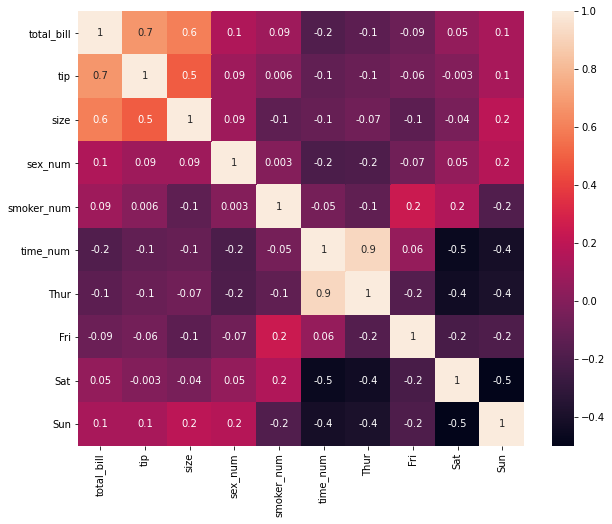

In [61]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
#Essentials
sns.heatmap(df_new.corr(),annot=True,fmt='.1g')

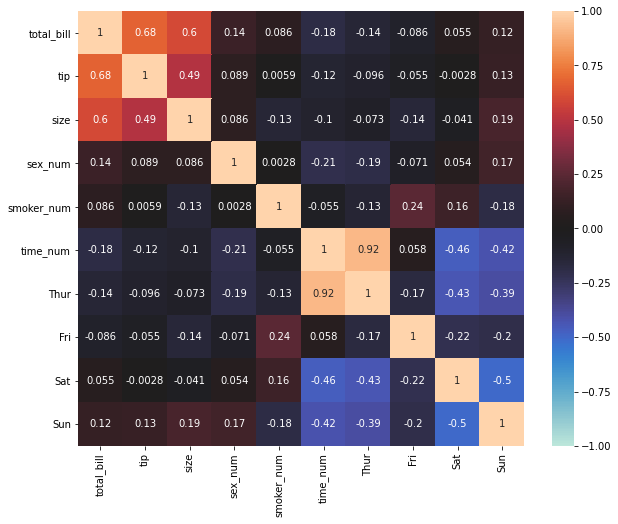

In [62]:
#adjusting the measurement bar
sns.heatmap(df_new.corr(), annot = True, vmin=-1, vmax=1, center= 0)

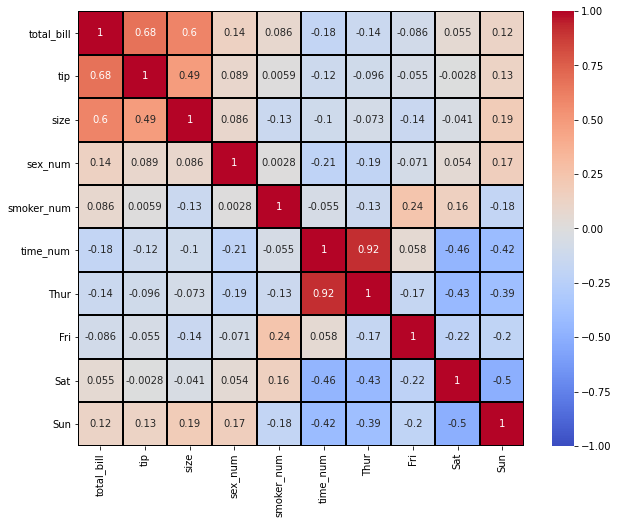

In [64]:
#aesthetic
sns.heatmap(df_new.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black')

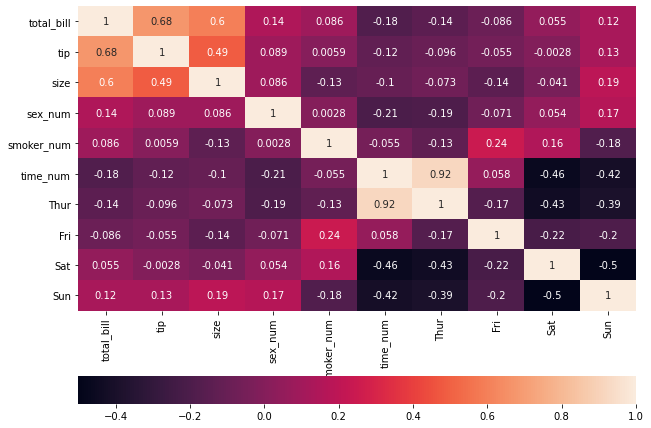

In [65]:
sns.heatmap(df_new.corr(), annot = True,  cbar_kws= {'orientation': 'horizontal'} )

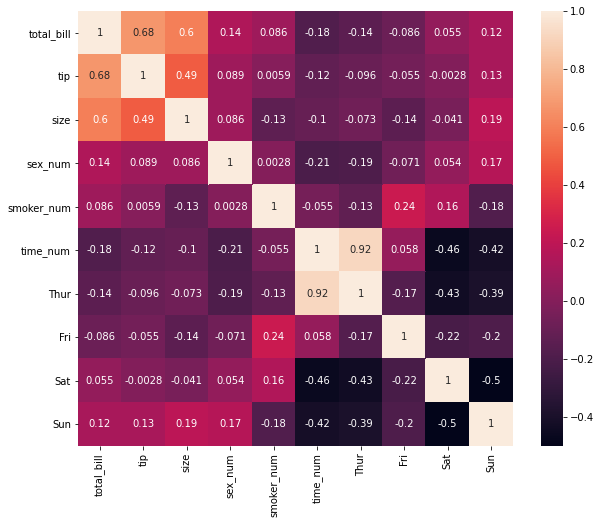

In [66]:

sns.heatmap(df_new.corr(), annot = True,square=True)

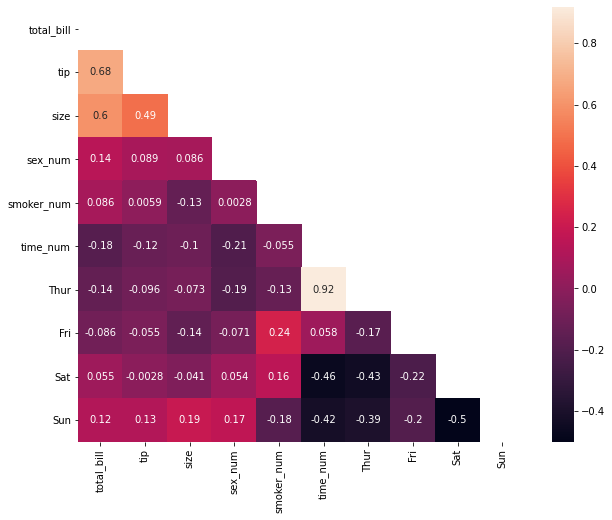

In [67]:
#changing the matrix shape, upper triangle will be null
matrix = np.triu(df_new.corr())
sns.heatmap(df_new.corr(), annot=True, mask=matrix)